In [1]:
import numpy as np
import pandas as pd 

In [2]:
data = pd.read_csv("datasets/pokemon-challenge/pokemon.csv") #data'yı yükleyelim.

In [3]:
data.info() #data hakkında genel bilgi verir.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          799 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.6+ KB


In [4]:
data.shape #datanın satır ve sütun sayısını verir.

(800, 12)

In [5]:
data.columns #sütun isimlerini verir.

Index([u'#', u'Name', u'Type 1', u'Type 2', u'HP', u'Attack', u'Defense',
       u'Sp. Atk', u'Sp. Def', u'Speed', u'Generation', u'Legendary'],
      dtype='object')

In [6]:
data.corr() #data'nın sütunlar arası ilişkiyi verir. (Bu ilişki her zaman doğru olmayabilir.)

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.097712,0.102664,0.094691,0.089199,0.085596,0.012181,0.983428,0.154336
HP,0.097712,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102664,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094691,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.089199,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.085596,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.012181,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.983428,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.154336,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


In [7]:
data.describe() #data'nın özeliklerini gösterir.

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [8]:
data.head() #ilk 5 datayı gösterir.

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [9]:
data.tail() #son 5 sütunu gösterir.

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [10]:
print data['Type 1'].value_counts(dropna =False) #Type1 sütununa göre kaç adet hangi tür pokenon olduğunu verir.

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64


In [11]:
x = data['Defense']>200     # defense'ı 200 den büyüp pokemonları göstertelim.
data[x]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [12]:
data[np.logical_and(data['Defense']>200, data['Attack']>100 )] #iki ayrı sütun için koşul ifadesi de kullanılabilir.

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [13]:
data[(data['Defense']>200) & (data['Attack']>100)] #logical_and fonksiyonu yerine and(&) operatörü kullanılabilir.

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [14]:
threshold = sum(data.Speed)/len(data.Speed) #ortalama hızı bulduk.
data["speed_level"] = ["high" if i > threshold else "low" for i in data.Speed] #koşul ifadesi oluşturduk ve speed_level sütununu ekledik.
data.loc[:10,["speed_level","Speed"]] #ilk 10'elemanı ve speed_level, Speed sütunlarını gösterir.

,speed_level,Speed
0,low,45
1,low,60
2,high,80
3,high,80
4,low,65
5,high,80
6,high,100
7,high,100
8,high,100
9,low,43


In [15]:
data.loc[10:1:-1,"HP":"Defense"] #Verileri testen göstertelim.

,HP,Attack,Defense
10,59,63,80
9,44,48,65
8,78,104,78
7,78,130,111
6,78,84,78
5,58,64,58
4,39,52,43
3,80,100,123
2,80,82,83
1,60,62,63


In [16]:
#HP değerlerinin yarısını alalım.
""""
def div(n):
    return n/2
data.HP.apply(div)
"""
data.HP.apply(lambda n : n/2)

0      22
1      30
2      40
3      40
4      19
5      29
6      39
7      39
8      39
9      22
10     29
11     39
12     39
13     22
14     25
15     30
16     20
17     22
18     32
19     32
20     20
21     31
22     41
23     41
24     15
25     27
26     20
27     32
28     17
29     30
       ..
770    47
771    39
772    33
773    25
774    22
775    34
776    45
777    28
778    21
779    42
780    24
781    22
782    27
783    29
784    32
785    27
786    37
787    42
788    27
789    47
790    20
791    42
792    63
793    63
794    54
795    25
796    25
797    40
798    40
799    40
Name: HP, Length: 800, dtype: int64

In [17]:
data= data.set_index("#") #datanın index'ini '#' sütunu ile değiştirelim.

In [18]:
data_new = data.head()    # ilk 5 data ile yeni bir data oluşturalım.
data_new

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,speed_level
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,low
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,low
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,high
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,high
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,low


In [19]:
#Attack ve Defense sütunlarını Name sütununa göre birleştirelim.
melted = pd.melt(frame=data_new,id_vars = 'Name', value_vars= ['Attack','Defense'])
melted

,Name,variable,value
0,Bulbasaur,Attack,49
1,Ivysaur,Attack,62
2,Venusaur,Attack,82
3,Mega Venusaur,Attack,100
4,Charmander,Attack,52
5,Bulbasaur,Defense,49
6,Ivysaur,Defense,63
7,Venusaur,Defense,83
8,Mega Venusaur,Defense,123
9,Charmander,Defense,43


In [20]:
melted.pivot(index = 'Name', columns = 'variable',values='value') #vairable değerlerini sütun yapar.
#data name'leri içerisinde tekrarlayan veriler bulunmamalıdır.

variable,Attack,Defense
Name,,
Bulbasaur,49,49
Charmander,52,43
Ivysaur,62,63
Mega Venusaur,100,123
Venusaur,82,83


In [21]:
#Dataları alt alta birleştirelim.
data1 = data.head()
data2 = data.tail() 
conc_data_row = pd.concat([data1,data2],axis =0,ignore_index =True) # axis = 0 : satır.
conc_data_row

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,speed_level
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,low
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,low
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,high
3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,high
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,low
5,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,low
6,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,high
7,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,high
8,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,high
9,Volcanion,Fire,Water,80,110,120,130,90,70,6,True,high


In [22]:
#Dataları yan yana birleştirelim.
data1 = data['Attack'].head()
data2 = data['Defense'].head()
conc_data_col = pd.concat([data1,data2],axis =1) # axis = 1 : sütun
conc_data_col

,Attack,Defense
#,,
1,49,49
2,62,63
3,82,83
4,100,123
5,52,43


In [23]:
data.dtypes #data type'larını verir.

Name           object
Type 1         object
Type 2         object
HP              int64
Attack          int64
Defense         int64
Sp. Atk         int64
Sp. Def         int64
Speed           int64
Generation      int64
Legendary        bool
speed_level    object
dtype: object

In [24]:
#Data type'larını değiştirebiliriz.
data['Type 1'] = data['Type 1'].astype('category')
data['Speed'] = data['Speed'].astype('float')
data.dtypes

Name             object
Type 1         category
Type 2           object
HP                int64
Attack            int64
Defense           int64
Sp. Atk           int64
Sp. Def           int64
Speed           float64
Generation        int64
Legendary          bool
speed_level      object
dtype: object

In [25]:
data.info() 
#Data incelendiğinde 800 veri olmasına rağmen Type2 414 değere sahiptir geriye kalan değerlern null değerlerdir.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 800
Data columns (total 12 columns):
Name           799 non-null object
Type 1         800 non-null category
Type 2         414 non-null object
HP             800 non-null int64
Attack         800 non-null int64
Defense        800 non-null int64
Sp. Atk        800 non-null int64
Sp. Def        800 non-null int64
Speed          800 non-null float64
Generation     800 non-null int64
Legendary      800 non-null bool
speed_level    800 non-null object
dtypes: bool(1), category(1), float64(1), int64(6), object(3)
memory usage: 71.1+ KB


In [26]:
data["Type 2"].value_counts(dropna =False) 
# 386 adet null değer olduğu görülebilir.

NaN         386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Rock         14
Water        14
Ghost        14
Ice          14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

In [27]:
data1=data.copy()   # datayı kopyalayalım.
data1["Type 2"].dropna(inplace = True) # inplace = True null değerleri NAN olarak atadığımız anlamına gelir.

In [28]:
assert data1['Type 2'].notnull().all() # datada null değer yok sonuç döndürmez.

In [29]:
data2=data.copy()   
data2["Type 2"].fillna('empty',inplace = True) # datadaki null değerleri emty ile değiştirelim.

In [30]:
assert data2['Type 2'].notnull().all() # datada null değer yok sonuç döndürmez.

In [31]:
data2 = data.head().copy()
date_list = ["1992-01-10","1992-02-10","1992-03-10","1993-03-15","1993-03-16"] #bir tarih listesi oluşturalım.
datetime_object = pd.to_datetime(date_list) #listeyi date_time a çevirelim.
data2["date"] = datetime_object #datamıza date_time'ı ekleyelim.
data2 = data2.set_index("date") #datamızın index'ini date yapalım.
data2 

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,speed_level
date,,,,,,,,,,,,
1992-01-10,Bulbasaur,Grass,Poison,45,49,49,65,65,45.0,1,False,low
1992-02-10,Ivysaur,Grass,Poison,60,62,63,80,80,60.0,1,False,low
1992-03-10,Venusaur,Grass,Poison,80,82,83,100,100,80.0,1,False,high
1993-03-15,Mega Venusaur,Grass,Poison,80,100,123,122,120,80.0,1,False,high
1993-03-16,Charmander,Fire,NaN,39,52,43,60,50,65.0,1,False,low


In [32]:
data2.loc["1993-03-16"] #Bir tarihteki datayı göstertelim.

Name           Charmander
Type 1               Fire
Type 2                NaN
HP                     39
Attack                 52
Defense                43
Sp. Atk                60
Sp. Def                50
Speed                  65
Generation              1
Legendary           False
speed_level           low
Name: 1993-03-16 00:00:00, dtype: object

In [33]:
data2.loc["1992-03-10":"1993-03-16"] #Bir tarih aralığındaki datayı göstertelim.

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,speed_level
date,,,,,,,,,,,,
1992-03-10,Venusaur,Grass,Poison,80,82,83,100,100,80.0,1,False,high
1993-03-15,Mega Venusaur,Grass,Poison,80,100,123,122,120,80.0,1,False,high
1993-03-16,Charmander,Fire,NaN,39,52,43,60,50,65.0,1,False,low


In [34]:
#"M" = month or "A" = year
data2.resample("A").mean() #Yıllara göre değerlerinin ortalamasını alalım. 

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,
1992-12-31,61.666667,64.333333,65.0,81.666667,81.666667,61.666667,1.0,False
1993-12-31,59.500000,76.000000,83.0,91.000000,85.000000,72.500000,1.0,False


In [35]:
data2.resample("M").mean() #Aylara göre değerlerinin ortalamasını alalım. 
#datamızda her aya karşılık gelen bir değer olmadığı için bazı aylar için NaN (null) değerini döndürdü.

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,
1992-01-31,45.0,49.0,49.0,65.0,65.0,45.0,1.0,0.0
1992-02-29,60.0,62.0,63.0,80.0,80.0,60.0,1.0,0.0
1992-03-31,80.0,82.0,83.0,100.0,100.0,80.0,1.0,0.0
1992-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
data2.resample("M").first().interpolate("linear") #İnterpolasyon ile eksik verilerimizi doldurabiliriz.
#Burada eksik olan tarih aralıklarını bir önceki değer ile sonraki değer arasında linear değerler atadı.
#Name Type1 ve Type2 string olduğu için NaN olarak kalır.

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,speed_level
date,,,,,,,,,,,,
1992-01-31,Bulbasaur,Grass,Poison,45.0,49.0,49.000000,65.000000,65.000000,45.0,1.0,False,low
1992-02-29,Ivysaur,Grass,Poison,60.0,62.0,63.000000,80.000000,80.000000,60.0,1.0,False,low
1992-03-31,Venusaur,Grass,Poison,80.0,82.0,83.000000,100.000000,100.000000,80.0,1.0,False,high
1992-04-30,NaN,NaN,NaN,80.0,83.5,86.333333,101.833333,101.666667,80.0,1.0,NaN,NaN
1992-05-31,NaN,NaN,NaN,80.0,85.0,89.666667,103.666667,103.333333,80.0,1.0,NaN,NaN
1992-06-30,NaN,NaN,NaN,80.0,86.5,93.000000,105.500000,105.000000,80.0,1.0,NaN,NaN
1992-07-31,NaN,NaN,NaN,80.0,88.0,96.333333,107.333333,106.666667,80.0,1.0,NaN,NaN
1992-08-31,NaN,NaN,NaN,80.0,89.5,99.666667,109.166667,108.333333,80.0,1.0,NaN,NaN
1992-09-30,NaN,NaN,NaN,80.0,91.0,103.000000,111.000000,110.000000,80.0,1.0,NaN,NaN


In [37]:
data2.resample("M").mean().interpolate("linear") #aylara göre değerlerin ortalamasını aldı ve interpolasyon uyguladı.

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,
1992-01-31,45.000000,49.0,49.0,65.00,65.00,45.000,1.0,0.0
1992-02-29,60.000000,62.0,63.0,80.00,80.00,60.000,1.0,0.0
1992-03-31,80.000000,82.0,83.0,100.00,100.00,80.000,1.0,0.0
1992-04-30,78.291667,81.5,83.0,99.25,98.75,79.375,1.0,0.0
1992-05-31,76.583333,81.0,83.0,98.50,97.50,78.750,1.0,0.0
1992-06-30,74.875000,80.5,83.0,97.75,96.25,78.125,1.0,0.0
1992-07-31,73.166667,80.0,83.0,97.00,95.00,77.500,1.0,0.0
1992-08-31,71.458333,79.5,83.0,96.25,93.75,76.875,1.0,0.0
1992-09-30,69.750000,79.0,83.0,95.50,92.50,76.250,1.0,0.0


In [38]:
import matplotlib.pyplot as plt
%matplotlib inline 

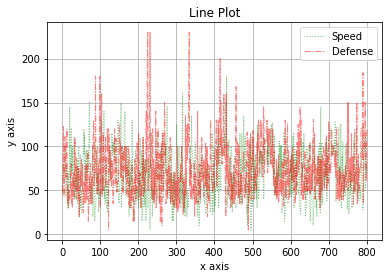

In [39]:
# Line Plot
data.Speed.plot(kind = 'line', color = 'g',label = 'Speed',linewidth=1,alpha = 0.5,grid = True,linestyle = ':')
data.Defense.plot(color = 'r',label = 'Defense',linewidth=1, alpha = 0.5,grid = True,linestyle = '-.')
plt.legend(loc='upper right')     # legend = etiketleri konumlandırır.
plt.xlabel('x axis')              # label = axis isimleri
plt.ylabel('y axis')
plt.title('Line Plot')            # title =  başlık ismi
plt.show()

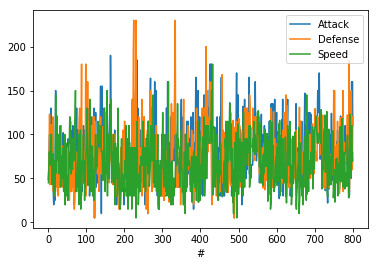

In [40]:
data.loc[:,["Attack","Defense","Speed"]].plot()

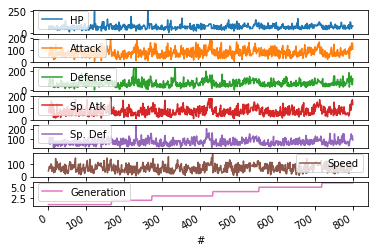

In [41]:
# subplots
data.plot(subplots = True)
plt.show()

Text(0.5,1,'Attack Defense Scatter Plot')

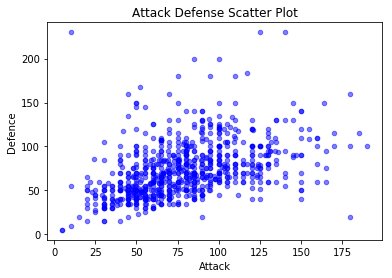

In [42]:
# Scatter Plot 
data.plot(kind='scatter', x='Attack', y='Defense',alpha = 0.5,color = 'blue')
plt.xlabel('Attack')
plt.ylabel('Defence')
plt.title('Attack Defense Scatter Plot')

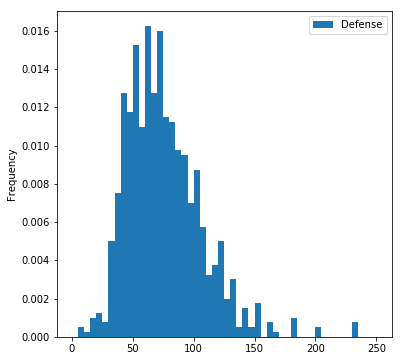

In [43]:
# hist plot  
data.plot(kind = "hist",y = "Defense",bins = 50,range= (0,250),density = True,figsize = (6,6))
plt.show()

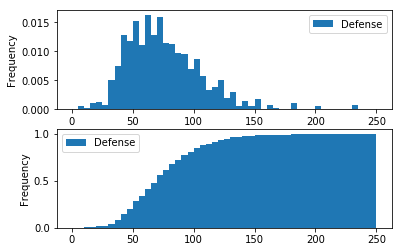

In [44]:
# histogram subplot with non cumulative and cumulative
fig, axes = plt.subplots(nrows=2,ncols=1)
data.plot(kind = "hist",y = "Defense",bins = 50,range= (0,250),density = True,ax = axes[0])
data.plot(kind = "hist",y = "Defense",bins = 50,range= (0,250),density = True,ax = axes[1],cumulative = True) #Kümülatif histogram.
#plt.savefig('graph.png') #grafiği kaydeder.
plt.show()

In [45]:
data.Speed.plot(kind = 'hist',bins = 50)
plt.clf() #plot'u temizler.

<Figure size 432x288 with 0 Axes>

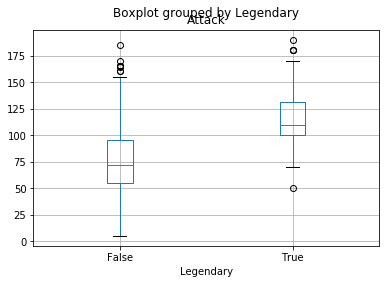

In [46]:
#pokemonların ataklarının Legendary özelliğine göre karşılaştırılması.

# Üstteki siyah çizgi max
# Üstteki mavi çizgi% 75
# Yeşil çizgi ortancadır (% 50)
# Alttaki mavi çizgi% 25
# Alttaki siyah çizgi min
# daireler ise ayrık noktaları oluşturur. 
# örneğin [1 1 1 1000] gibi bir dizide ayrık nokta 1000'dir. 
data.boxplot(column='Attack',by = 'Legendary') 
plt.show()

In [47]:
import seaborn as sns # visualization tool

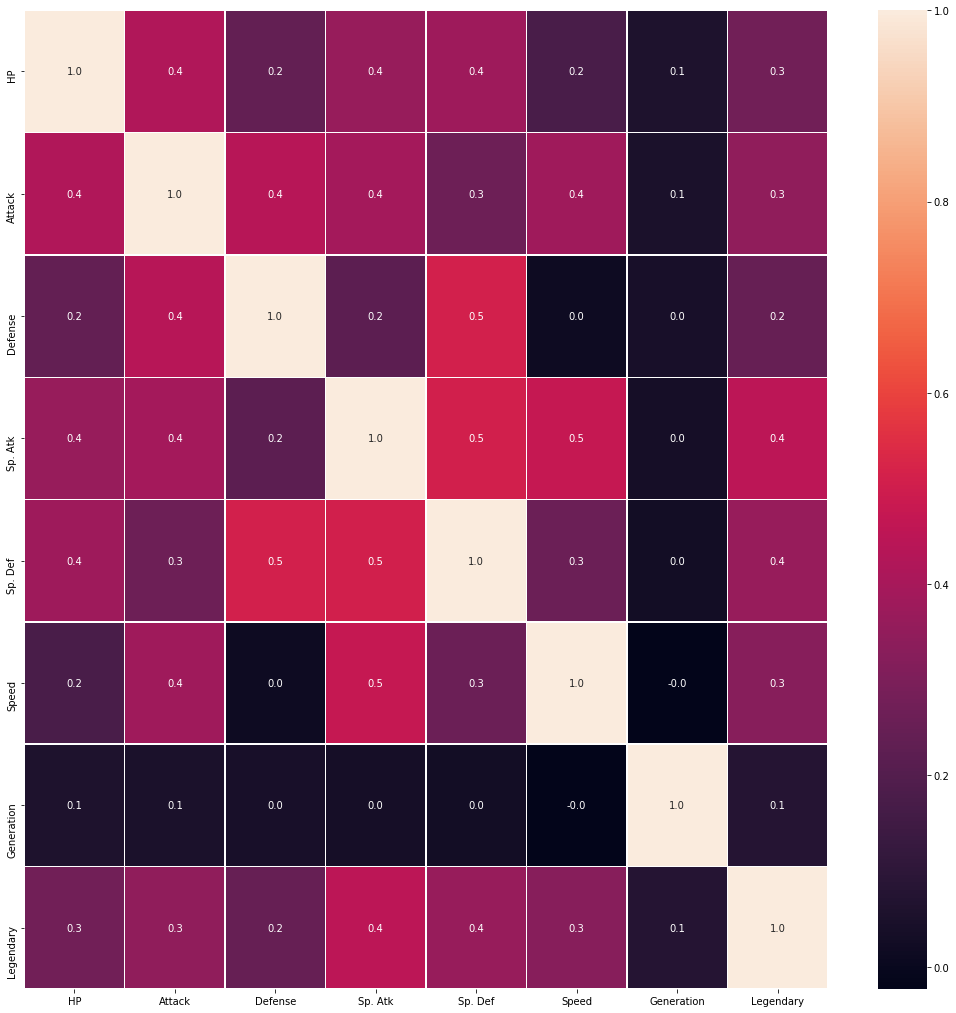

In [48]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

# Referans Link
## https://www.kaggle.com/kanncaa1/data-sciencetutorial-for-beginners/